In [1]:
%matplotlib inline

In [1]:
def easy_draw():
    with open("simu.json",'r') as f:
        d = json.loads(f.read())
    dataset_num = d['dataset_num']
    method_num = d['method_num']
    iter_per_set = d['iter_per_set']
    dir_name = d['dir_name']
    data_src = d['data_src']
    marker = d['change_paras']
    title = d['title']
    
#     marker = ['cand=30','cand=60','cand=90','cand=120']
#     marker = ['k=10','k=20','k=30']
#     marker = ['cand=40','cand=42','cand=44']


    color = ['c','b','r','y','m','k']
    Results = np.zeros((dataset_num, method_num, iter_per_set))
    Stats = np.zeros((dataset_num, method_num, 2))#0 for mean, 1 for std

    for i in range(0, dataset_num):
        for j in range(0, iter_per_set):
            with open(dir_name+ '/' + data_src + '_' +
                      str(i) + '_' + str(j) + ".json",'r') as f:
                results = json.loads(f.read())
                for m in range(0, method_num):
                    Results[i,m,j] = results[m][0]
                    
    for i in range(0,dataset_num):
        for m in range(0, method_num):
            Stats[i,m,0] = np.mean(Results[i,m,:])
            Stats[i,m,1] = np.std(Results[i,m,:])

    print Stats[0,0,1]
    ind = np.arange(dataset_num)
    width = 0.2
    p_list = []
    for m in range(0, method_num):
        if method_num % 2 != 0:
            bias = np.floor(method_num/2)
        else:
            bias = (method_num - 1.0)/2
        p = plt.bar(ind + width*(m-bias), Stats[:,m,0], width=width, color=color[m], yerr=Stats[:,m,1])
        p_list.append(p)
            
    plt.xticks(ind, marker)
    plt.ylim(500,650)
    tup = tuple([p[0] for p in p_list])
    plt.legend(tup,("Greedy", "Noisy","Random"))
    plt.ylabel("Num of Covered Targets")
    plt.savefig(d['pic_name'])
    plt.show()

In [2]:
from matplotlib import pyplot as plt
def truncated_geo(p, N):
    x = np.arange(1,N+1)
    y = (1-p)**(x-1) * p
    y = y / np.sum(y)
    return y

3671.0
950


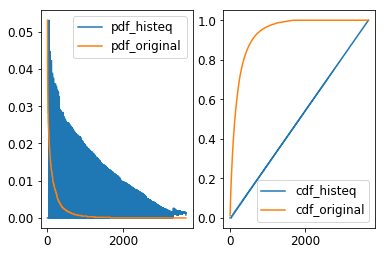

In [131]:
# N = 3000
# y = truncated_geo(0.1,N)
# print(y)
from matplotlib import rcParams
y = xi
cdf = np.cumsum(y) / np.sum(y)
L = y.shape[0]
rcParams['font.size'] = 12
new_pdf = np.zeros(L)
level = np.ceil((L-1)*cdf + 0.5) - 1
print(np.max(level))
for i,l in enumerate(level):
    new_pdf[int(l)] += y[i]
plt.subplot(121)
plt.plot(new_pdf)
plt.plot(y)
plt.legend(['pdf_histeq','pdf_original'])
plt.subplot(122)
plt.plot(np.cumsum(new_pdf)/ np.sum(new_pdf))
plt.plot(np.cumsum(y)/ np.sum(y))

plt.legend(['cdf_histeq','cdf_original'])
plt.savefig('histeq_demo.png')
print(len(np.where(new_pdf!=0)[0]))

In [108]:
np.where(new_pdf!=0)

(array([  39,   72,  103,  131,  159,  186,  212,  238,  263,  288,  312,
         333,  354,  375,  396,  417,  437,  456,  476,  495,  514,  532,
         551,  570,  588,  606,  624,  642,  660,  677,  695,  712,  729,
         745,  762,  778,  795,  811,  827,  843,  859,  875,  891,  906,
         921,  936,  951,  966,  980,  995, 1009, 1023, 1037, 1051, 1065,
        1078, 1092, 1106, 1119, 1132, 1145, 1158, 1172, 1185, 1197, 1210,
        1223, 1235, 1248, 1260, 1272, 1284, 1296, 1308, 1320, 1332, 1343,
        1355, 1366, 1378, 1389, 1400, 1411, 1422, 1433, 1443, 1454, 1464,
        1475, 1485, 1496, 1506, 1516, 1527, 1537, 1547, 1557, 1567, 1577,
        1587, 1596, 1606, 1616, 1625, 1635, 1644, 1653, 1663, 1672, 1682,
        1691, 1700, 1709, 1718, 1727, 1736, 1745, 1754, 1763, 1771, 1780,
        1789, 1797, 1806, 1814, 1823, 1831, 1839, 1848, 1856, 1864, 1872,
        1881, 1889, 1897, 1904, 1912, 1920, 1928, 1935, 1943, 1950, 1958,
        1965, 1972, 1979, 1986, 1993, 

In [68]:
np.mean(xi), np.max(xi), np.min(xi)

(0.0013616557734204794, 0.05312601230968578, 0.0)

In [1]:
pwd

u'/home/HenryHuang/DataMining/DP/Differential_Privacy_Coverage/code'

In [2]:
ls

Test Notebook.ipynb  read_data.py         test.py
diff_coverage.py     read_data.pyc        util.py
optim_coverage.py    simulate.py          xi.npy
optim_coverage.pyc   test/


In [5]:
eps=4
constraint = 150
data_src = 'SG'
candidate = 40
k_favor = 5
p = 0.02
q = 1.0 / ((1.0 - p) / (p * np.exp(eps)) + 1)
new_simulation = Diff_Coverage(flip_p=p, flip_q=q, data_src=data_src,
                                   target_constraint=constraint, candidate_num=candidate,
                                   k_favor=k_favor, hist=False, random_start=1)

In [6]:
choice = new_simulation.train(optimizer='ada_prior')
    

6064
2018-09-21 22:06:43.091723 Finish Constructing Sparse Matrix, shape (6064, 147), nonzeros 30320
Data source:SG, p:0.02, people:6064, candidate:40, target: 147, k_favor:5
mean of prior:0.034014, sum:5.00, std:0.04254
(6064, 147)
Finish Iter_0


0 0.0
0 0.0
0 0.0
0 0.0
0 1.1102230246251565e-16
0 0.0
0 0.0
0 -2.220446049250313e-16
0 2.220446049250313e-16
0 2.220446049250313e-16
0 0.0
0 -2.220446049250313e-16
0 -2.220446049250313e-16
0 0.0
0 -2.220446049250313e-16
0 0.0
0 1.1102230246251565e-16
0 0.0
0 0.0
0 0.0
0.0 0.0
0.0003252497203618381 0.16661347141093974
0.0006504994407236762 0.316006943809927
0.0009757491610855144 0.4470422409014314
0.0013009988814473524 0.5596054193033515
0.0016262486018091906 0.6543991022231936
0.0019514983221710289 0.7327225796815653
0.0022767480425328673 0.7962609154458311
0.002601997762894705 0.8468983642709769
0.0029272474832565433 0.8865652663326299
0.0032524972036183813 0.9171220457624386
0.0035777469239802197 0.94027950228307
0.0039029966443420577 0.9575514696021837
0.004228246364703895 0.970234106595977
0.004553496085065735 0.9794054085223176
0.004878745805427572 0.9859387075487566
0.00520399552578941 0.9905246826412129
0.005529245246151248 0.9936974498634539
0.005854494966513087 0.995861439093

optim_coverage.py:124: RuntimeWarning: invalid value encountered in double_scalars
  ratio = numerator / sum_


nan
0.03610271896016404 nan
0.03642796868052588 nan
0.03675321840088771 nan
0.03707846812124955 nan
0.03740371784161139 nan
0.03772896756197323 nan
0.038054217282335066 nan
0.0383794670026969 nan
0.03870471672305874 nan
0.03902996644342058 nan
0.03935521616378242 nan
0.039680465884144256 nan
0.04000571560450609 nan
0.04033096532486793 nan
0.04065621504522977 nan
0.040981464765591606 nan
0.041306714485953445 nan
0.04163196420631528 nan
0.04195721392667712 nan
0.042282463647038956 nan
0.042607713367400796 nan
0.042932963087762635 nan
0.043258212808124474 nan
0.043583462528486314 nan
0.043908712248848146 nan
0.044233961969209985 nan
0.044559211689571825 nan
0.044884461409933664 nan
0.0452097111302955 nan
0.045534960850657336 nan
0.04586021057101918 nan
0.046185460291381014 nan
0.04651071001174286 nan
0.04683595973210469 nan
0.047161209452466525 nan
0.04748645917282837 nan
0.047811708893190204 nan
0.04813695861355205 nan
0.04846220833391388 nan
0.048787458054275715 nan
0.04911270777463756 

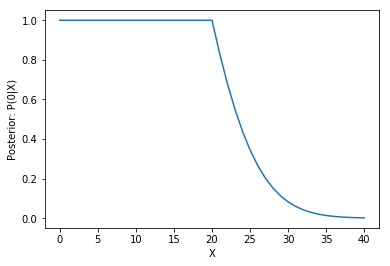

In [7]:
y = []
self = new_simulation
N = 200
for x in range(0,N):
    xi = x - (self.p + 0.5 * self.f * (self.q - self.p)) * 1000
    xi /= (1 - self.f) * (self.q - self.p)
    xi /= self.people
    if xi<0: 
        xi = 0 
    y.append(new_simulation.posterior_core(x, xi))
    print xi, 1 - new_simulation.posterior_core(x, xi)

plt.ylabel("Posterior: P(0|X)")
plt.xlabel("X")
plt.plot(range(0,N),y)
    

In [ ]:
def cal_prior(sum_, N):
    xi = sum_ - (self.p + 0.5 * self.f * (self.q - self.p)) * N
    xi /= (1 - self.f) * (self.q - self.p)
    xi /= N
    xi[xi<0] = 0
    return xi

def cal_posterior(row_):
    prior = cal_prior(row_)
    post_sum = 0
    for i, pri in enumerate(prior):
        post_sum += self.posterior_core(row_[i], pri)
    return post_sum

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [41]:
best_choice = np.load("best_choice.npy")
best_choice = np.array(best_choice, dtype=np.float64)
best_choice /= 600.0
crowd_choice = np.load("crowd_choice.npy")
random_choice = np.load("random_choice.npy")

our_choice = np.load('our_choice.npy')

In [4]:
from collections import defaultdict
def word_count(arr):
    d = defaultdict(int)
    for a in arr:
        d[a] += 1
    items = sorted(d.items(), key=lambda x: x[0])
    return items
    
        

In [5]:
def plot_items(items, ax):
    x,y = zip(*items)
    ax.plot(x,y)

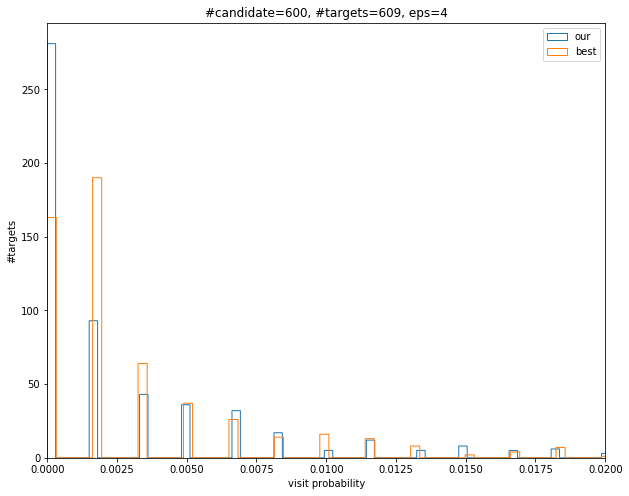

In [46]:
def plot_prior(prior_list):
    color = ['b', 'y', 'r', 'g']
    color = color[:len(prior_list)]
    plt.figure(figsize=(10,8))
    plt.xlim((0,0.02))
    plt.xlabel('visit probability')
    plt.ylabel('#targets')
    for p,c in zip(prior_list, color):
        plt.hist(p, histtype='step', bins= len(p), align='mid')
#     plt.legend(['random', 'best','crowd'])
    plt.legend(['our', 'best'])
    plt.title('#candidate=600, #targets=609, eps=4')
# prior_list = [best_choice, random_choice]
# # prior_list = [(random_choice - crowd_choice) * 600]
# plot_prior(prior_list)

prior_list = [our_choice, best_choice]
# prior_list = [(random_choice - crowd_choice) * 600]
plot_prior(prior_list)

In [6]:
best_items = word_count(best_choice)
crowd_items = word_count(crowd_choice)

ax = plt.figure()
plot_items(best_items)
plot_items(crowd_items)
ax.legend(['best', 'pool'])

TypeError: plot_items() takes exactly 2 arguments (1 given)

<Figure size 432x288 with 0 Axes>

In [35]:
def cal_stats(items):
    x,y = zip(*items)
    print np.min(x), np.mean(x), np.max(x)

In [37]:
cal_stats(crowd_items)
cal_stats(best_items)

0.0 0.03271713147410358 0.22270916334661356
0.0 0.05213333333333333 0.19833333333333333


In [72]:
np.sum((random_choice - crowd_choice)*600 < 0)

268

In [70]:
np.sum((best_choice - random_choice) * 600 < 0)

91

In [65]:
np.mean(random_choice * 600)

4.926108374384237